## Aufgabe 1 Aufgabenteil 2

As we are using only the training data split the numbers may vary if the split is regenerated. This happens because the rows are split randomly into test, training and validation.

### 2.1

In [1]:
import pandas as pd

# read train data from preprocessing 
data = pd.read_pickle('./files/train.pickle')

# calculate mean values and standard deviation for imdb_score and imdb_votes
imdb_score_mean = data['imdb_score'].mean()
imdb_score_std = data['imdb_score'].std()
imdb_votes_mean = data['imdb_votes'].mean()
imdb_votes_std = data['imdb_votes'].std()

# print calculations
print(f'imdb score:\n  mean: {round(imdb_score_mean, 2)}\n  standard deviation: {round(imdb_score_std, 2)}')
print(f'imdb votes:\n  mean: {round(imdb_votes_mean, 2)}\n  standard deviation: {round(imdb_votes_std, 2)}')

imdb score:
  mean: 6.54
  standard deviation: 1.14
imdb votes:
  mean: 23000.79
  standard deviation: 83517.26


### 2.2

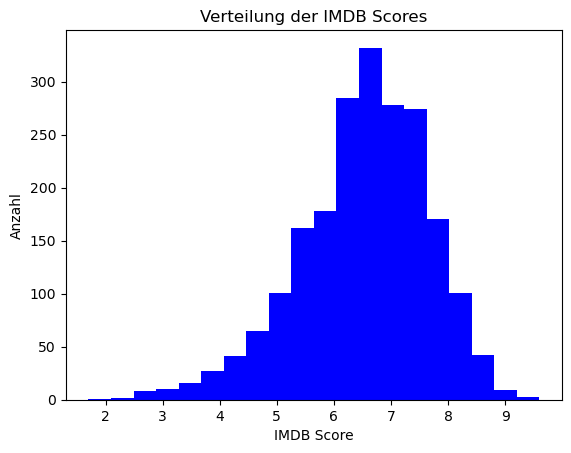

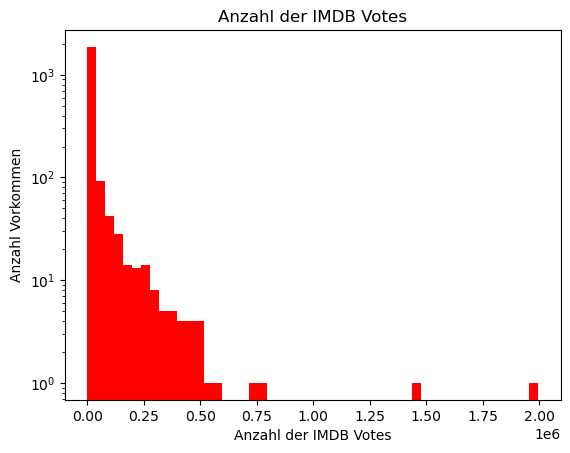

In [2]:
import pandas as pd
import matplotlib.pyplot as plot

# read train data from preprocessing 
data = pd.read_pickle('./files/train.pickle')

# imdb score histogram
plot.hist(data['imdb_score'], bins=20, histtype='stepfilled', color='blue')
plot.title('Verteilung der IMDB Scores')
plot.xlabel('IMDB Score')
plot.ylabel('Anzahl')
plot.show()

# imdb votes histogram
plot.hist(data['imdb_votes'], bins=50,histtype='stepfilled', color='red')

# set y-axis to logarithmic scale (makes it easier to see the distribution)
plot.yscale('log')

# set title and labels
plot.title('Anzahl der IMDB Votes')
plot.xlabel('Anzahl der IMDB Votes')
plot.ylabel('Anzahl Vorkommen')

plot.show()

### 2.3

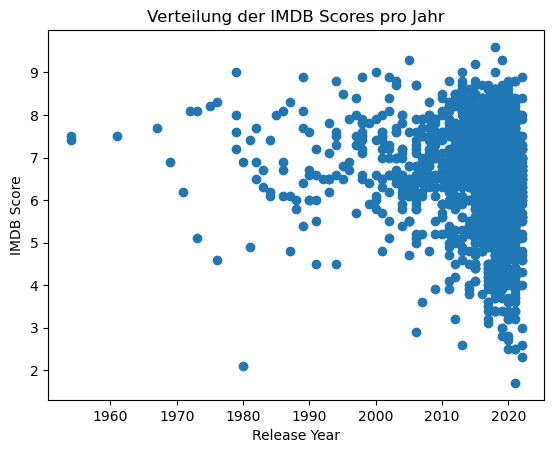

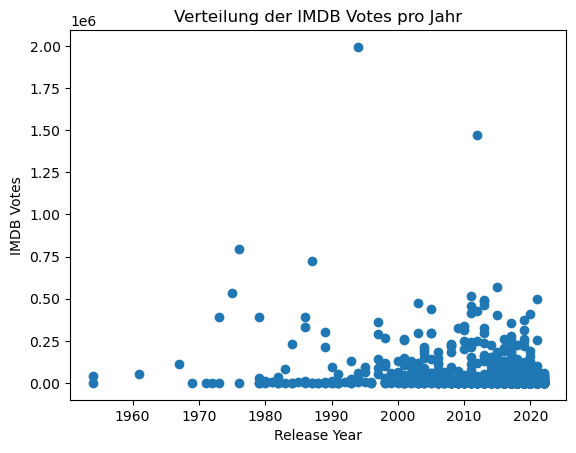

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# open train data from preprocessing 
with open('./files/train.pickle', 'rb') as f:
    netflix_data = pd.read_pickle(f)
    
# removing invalid release_year values
netflix_data = netflix_data[pd.to_numeric(netflix_data['release_year'], errors='coerce').notnull()]

# creating first scatter plot for IMDB scores
plt.scatter(netflix_data['release_year'].astype('int'), netflix_data['imdb_score'])
plt.title('Verteilung der IMDB Scores pro Jahr')
plt.xlabel('Release Year')
plt.ylabel('IMDB Score')

plt.show()

# creating second scatter plot for IMDB votes
plt.scatter(netflix_data['release_year'].astype('int'), netflix_data['imdb_votes'])
plt.title('Verteilung der IMDB Votes pro Jahr')
plt.xlabel('Release Year')
plt.ylabel('IMDB Votes')

plt.show()

### 2.4

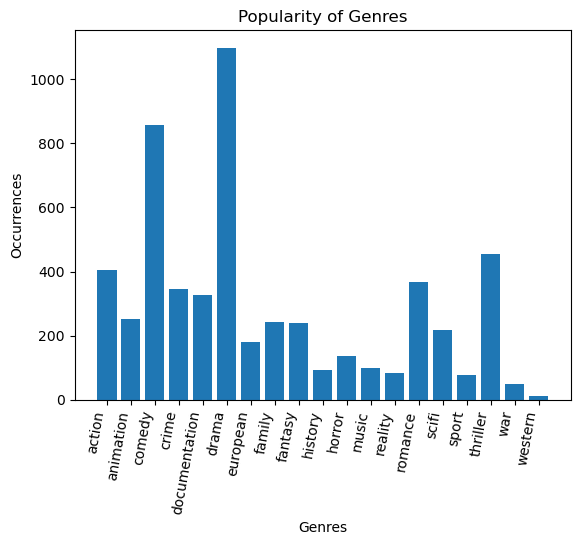

In [4]:
import matplotlib.pyplot as plot
import pandas as pd

# read train data from preprocessing 
data = pd.read_pickle('./files/train.pickle')

# get genres by getting the column names of all columns with index > 9
names = data.iloc[:, 9:].columns

# count the popularity of each genre
values = []
for c in names:
    values.append(data[c].sum())

# create subplot
fix, ax = plot.subplots()

# add bars and fitting values
ax.bar(names, values)

# set title and labels
ax.set_title("Popularity of Genres")
ax.set_ylabel('Occurrences')
ax.set_xlabel('Genres')

# rotate genre names to make them readable
plot.setp(ax.get_xticklabels(), rotation=80, ha='right')

plot.show()

### 2.5

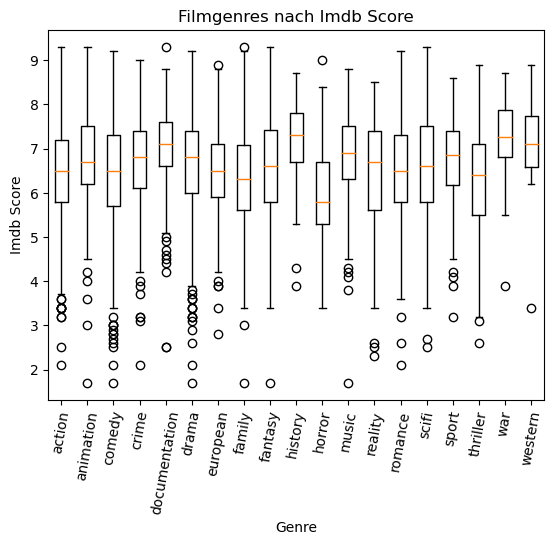

In [7]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np

# read train data from preprocessing 
data = pd.read_pickle('./files/train.pickle')

# get genres by getting the column names of all columns with index > 9
category_names = data.iloc[:, 9:].columns

# get imdb scores of genres
columns = []
for category_name in category_names:
    category = data.loc[data[category_name] == 1]
    columns.append(category['imdb_score'])

# create subplot
fig, ax = plot.subplots()

# create boxplot
ax.boxplot(columns)

# set title and labels
ax.set_title('Filmgenres nach Imdb Score')
ax.set_ylabel('Imdb Score')
ax.set_xlabel('Genre')

category_size = np.arange(1, 20, 1)

# rotate genre names to make them readable
plot.xticks(category_size, category_names, rotation=80)

plot.show()